# Prediction of the target in the Test.csv

## Preprocessing of the Test.csv

In [101]:
import pandas as pd
import numpy as np
import importlib
import preprocessing
importlib.reload(preprocessing)
from preprocessing import preprocess_for_air_quality

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error

RSEED = 42

In [36]:
#df_test = pd.read_csv('data/Test.csv')

In [59]:
import pickle

model_path = "models/model_randomforest.pkl"   # relativer Pfad
with open(model_path, "rb") as file:
    loaded_model = pickle.load(file)

print("✅ Modell erfolgreich geladen!")

✅ Modell erfolgreich geladen!


In [91]:
df = pd.read_csv('data/Train.csv')

In [92]:
df_test.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
24141,S32B9IH X 2020-03-03,2020-03-03,S32B9IH,79.0,23.0,155.0,29903.00,5,53.406593,90.000000,...,60.601157,-152.358020,16.989528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26865,UB4SRN5 X 2020-01-10,2020-01-10,UB4SRN5,129.0,27.0,184.0,12074.00,490,19.400000,77.400002,...,65.172025,-158.038725,45.642109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22772,QFNUGSK X 2020-02-17,2020-02-17,QFNUGSK,72.0,61.0,117.0,2100.85,24,9.020000,79.900002,...,51.530494,91.581413,59.373319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25624,T6AW5VC X 2020-01-19,2020-01-19,T6AW5VC,34.0,13.0,76.0,2036.50,201,5.600000,23.800001,...,1.761258,-166.926480,61.147652,1823.253584,3430.935347,0.119844,29.526872,1.74332,-166.823891,61.132824
21690,PA1M3UV X 2020-04-03,2020-04-03,PA1M3UV,61.0,19.0,79.0,2072.10,24,21.328571,43.528574,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

In [93]:
df.isna().sum()

Place_ID X Date                     0
Date                                0
Place_ID                            0
target                              0
target_min                          0
                                ...  
L3_CH4_aerosol_optical_depth    24765
L3_CH4_sensor_azimuth_angle     24765
L3_CH4_sensor_zenith_angle      24765
L3_CH4_solar_azimuth_angle      24765
L3_CH4_solar_zenith_angle       24765
Length: 82, dtype: int64

In [94]:
df_train, df_test = train_test_split(df, random_state=RSEED, train_size=0.2)

In [103]:
df_train_proc = preprocess_for_air_quality(df_train)

In [107]:
df_test_proc = preprocess_for_air_quality(df_test)

In [104]:
df_train_proc.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_AER_AI_absorbing_aerosol_index,L3_SO2_SO2_column_number_density
0,010Q650 X 2020-01-11,2020-01-11,010Q650,24.0,16.0,32.0,279.19,85,-0.445819,-1.849847,...,-0.848251,-0.404114,-0.308917,-0.272424,-0.774326,0.446147,-0.890848,-1.053949,1.606420,0.876826
1,010Q650 X 2020-01-13,2020-01-13,010Q650,25.0,17.0,41.0,286.02,90,-0.131284,-2.053901,...,-0.897930,-0.640720,0.175733,-0.014990,-0.479171,0.037969,-1.079451,-0.852106,2.626510,-1.041693
2,010Q650 X 2020-01-15,2020-01-15,010Q650,23.0,11.0,43.0,682.80,96,0.271230,-1.677186,...,-1.251464,-0.591328,0.482903,-0.298045,-0.739658,-1.008759,-0.683996,-0.563670,2.447116,0.191365
3,010Q650 X 2020-01-18,2020-01-18,010Q650,60.0,39.0,96.0,2762.28,81,-0.101832,-1.855079,...,-0.594384,-0.633978,0.155774,0.570448,2.283263,1.084698,-0.834769,-1.215254,-0.372440,0.338891
4,010Q650 X 2020-01-26,2020-01-26,010Q650,27.0,9.0,51.0,1525.35,81,0.452961,-2.053901,...,-1.179850,-0.667844,-1.248459,0.970878,0.078065,-0.778870,-0.801266,-0.584835,0.990932,-0.025472


In [108]:
df_test_proc.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_AER_AI_absorbing_aerosol_index,L3_SO2_SO2_column_number_density
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,-0.417403,-0.514728,...,-0.812065,-0.635125,-1.428228,-0.120044,-0.238446,-1.018600,-1.198676,-0.623404,-0.096965,-0.606914
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,-0.078378,-1.122321,...,-0.647686,-0.761932,-1.340920,0.202342,1.046299,-1.066551,-1.027345,-0.631172,0.198598,0.160744
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,0.091135,-1.943103,...,-1.207651,-0.739359,-1.465850,0.154238,0.481453,-1.019669,-0.961280,-0.687913,0.360133,0.160252
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,-0.802390,-2.588004,...,-0.587854,0.092243,-1.416401,0.096259,-0.036079,-0.969578,-0.847819,-0.554919,0.805567,0.343967
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,-0.144299,-1.340841,...,-1.152549,-0.399595,0.127431,0.075236,0.677215,0.857118,-1.091857,-1.234817,2.817109,0.694351


In [49]:
df_test_proc.isna().sum()

Place_ID X Date                 0
Date                            0
Place_ID                        0
target                          0
target_min                      0
                               ..
L3_CH4_aerosol_optical_depth    0
L3_CH4_sensor_azimuth_angle     0
L3_CH4_sensor_zenith_angle      0
L3_CH4_solar_azimuth_angle      0
L3_CH4_solar_zenith_angle       0
Length: 82, dtype: int64

In [50]:
df_test_proc.isna().sum()

Place_ID X Date                 0
Date                            0
Place_ID                        0
target                          0
target_min                      0
                               ..
L3_CH4_aerosol_optical_depth    0
L3_CH4_sensor_azimuth_angle     0
L3_CH4_sensor_zenith_angle      0
L3_CH4_solar_azimuth_angle      0
L3_CH4_solar_zenith_angle       0
Length: 82, dtype: int64

In [117]:
df_test_proc.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_AER_AI_absorbing_aerosol_index,L3_SO2_SO2_column_number_density
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,-0.417403,-0.514728,...,-0.812065,-0.635125,-1.428228,-0.120044,-0.238446,-1.018600,-1.198676,-0.623404,-0.096965,-0.606914
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,-0.078378,-1.122321,...,-0.647686,-0.761932,-1.340920,0.202342,1.046299,-1.066551,-1.027345,-0.631172,0.198598,0.160744
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,0.091135,-1.943103,...,-1.207651,-0.739359,-1.465850,0.154238,0.481453,-1.019669,-0.961280,-0.687913,0.360133,0.160252
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,-0.802390,-2.588004,...,-0.587854,0.092243,-1.416401,0.096259,-0.036079,-0.969578,-0.847819,-0.554919,0.805567,0.343967
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,-0.144299,-1.340841,...,-1.152549,-0.399595,0.127431,0.075236,0.677215,0.857118,-1.091857,-1.234817,2.817109,0.694351


In [118]:
X_train = df_train_proc.drop(columns=['Place_ID X Date', 'Date', 'Place_ID', 'target','target_min', 'target_max', 'target_variance', 'target_count'])
y_train = df_train_proc['target'] 

In [119]:
X_test = df_test_proc.drop(columns=['Place_ID X Date', 'Date', 'Place_ID', 'target','target_min', 'target_max', 'target_variance', 'target_count'])
y_test = df_test_proc['target'] 

In [120]:
def print_pretty_summary(name, y_actual, y_pred):
    print(name)
    print('=======================')
    
    r2 = r2_score(y_actual, y_pred)
    rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
    
    print(f"R²:   {r2:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print()

beste parameter for RandomForestReg:  
{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 16, 'bootstrap': True}

In [121]:
rf = RandomForestRegressor(n_estimators= 400, min_samples_split= 5, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 16, bootstrap= True, random_state=RSEED)
rf.fit(X_train, y_train)



RandomForestRegressor(max_depth=16, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=400, random_state=42)

In [122]:
y_pred_test = rf.predict(X_test)

In [61]:
#y_pred_loaded = loaded_model.predict(X_test)
#print_pretty_summary('loaded model', y_test, y_pred_loaded)

In [123]:
print_pretty_summary('RF', y_test, y_pred_test)

RF
R²:   0.475
RMSE: 33.734



In [ ]:
#y_pred_final = rf.predict(X_final)

In [ ]:
#rf_best_rs.fit(X_train, y_train)
#fi = (pd.DataFrame({
#        "feature": X_train.columns,
#        "importance": rf_best_rs.featureimportances
#     })
#     .sort_values("importance", ascending=False))
#print(fi.head(20))

In [132]:
df_y_pred_test = pd.DataFrame(y_pred_test)

df_y_pred_test.head()
#df_y_pred_test.info()

,0
0,38.119019
1,50.172605
2,40.879843
3,47.922694
4,65.779041


In [146]:
y_pred_series = df_y_pred_test.iloc[:, 0].reset_index(drop=True)
y_pred_series.name = 'y_pred'
df_pred_concat = pd.concat(
    [
        df_test_proc.Date.reset_index(drop=True),
        df_test_proc.Place_ID.reset_index(drop=True),
        y_pred_series
    ],
    axis=1
)

df_pred_concat.columns = ['Date', 'Place_ID', 'y_pred']

In [147]:
df_pred_concat.head()
df_pred_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22796 entries, 0 to 22795
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      22796 non-null  datetime64[ns]
 1   Place_ID  22796 non-null  object        
 2   y_pred    22796 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 534.4+ KB


In [130]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_actual_vs_pred_over_time(
    model, X, y, meta_df,
    date_col="Date", place_col="Place_ID",
    place_id=None, rolling=None, title_prefix="PM2.5"
):
    """
    Plot Actual vs. Predicted PM2.5 über die Zeit.
    
model: trainiertes Modell oder Pipeline mit .predict()
X, y: Trainings-Features/-Ziel (y als Series, index wie X)
meta_df: DataFrame mit Date & Place_ID für dieselben Zeilen (Index == X.index)
place_id: optional, nur diesen Ort plotten (z.B. '010G650')
rolling: optionales Fenster (z.B. 3) für gleitenden Mittelwert
"""

    # Vorhersagen
    y_pred = model.predict(X)

    # Zusammenführen und sortieren
    dfp = pd.DataFrame({
        "Date": meta_df.Date,
        "Place_ID": meta_df[place_col],
        "Actual": y.values if isinstance(y, pd.Series) else y,
        "Pred": y_pred
    }, index=meta_df.index)

    if place_id is not None:
        dfp = dfp[dfp["Place_ID"] == place_id]

    dfp = dfp.sort_values("Date")

    # optional glätten
    if rolling is not None and rolling > 1:
        dfp["Actual_plot"] = dfp["Actual"].rolling(rolling, min_periods=1).mean()
        dfp["Pred_plot"]   = dfp["Pred"].rolling(rolling, min_periods=1).mean()
    else:
        dfp["Actual_plot"], dfp["Pred_plot"] = dfp["Actual"], dfp["Pred"]

    # Plot
    plt.figure(figsize=(12,4))
    plt.plot(dfp["Date"], dfp["Actual_plot"], label="Actual PM2.5")
    plt.plot(dfp["Date"], dfp["Pred_plot"],   label="Predicted PM2.5")
    ttl = f"{title_prefix} Trend"
    if place_id is not None:
        ttl += f" — {place_id}"
    plt.title(ttl)
    plt.xlabel("Date")
    plt.ylabel("PM2.5 (µg/m³)")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

In [112]:
y_test.shape

(1566,)

In [113]:
df_pred_concat.shape

(22908, 3)

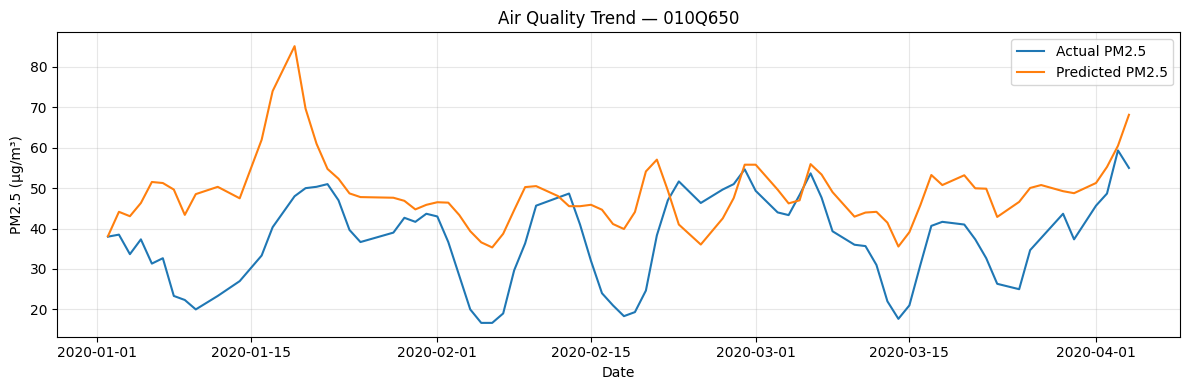

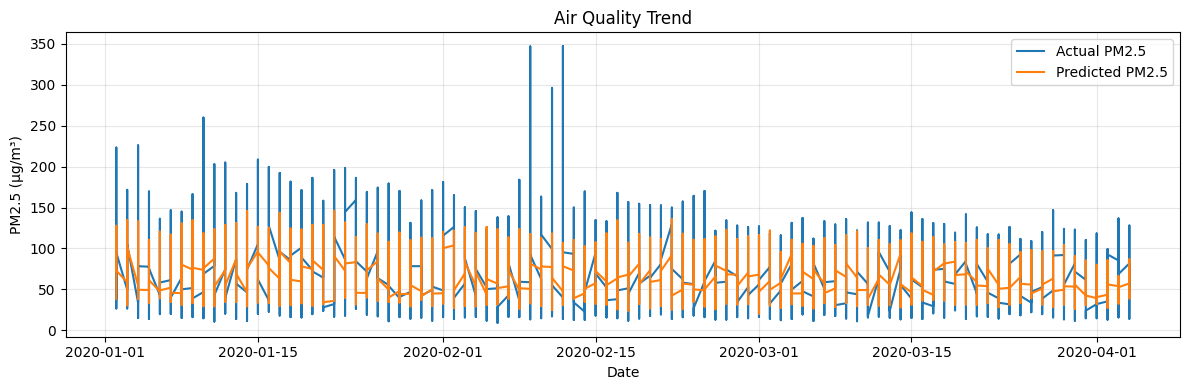

In [148]:
# meta_df muss zu X/y passen und die Originalspalten Date & Place_ID enthalten
#meta_train = df.loc[df_pred_concat.index, ["Date", "Place_ID"]]

# 1) Plot für einen Ort (wie im Beispielbild)
plot_actual_vs_pred_over_time(rf, X_test, y_test, df_pred_concat,
                              place_id="010Q650", rolling=3, title_prefix="Air Quality")

# 2) Gesamter Trainingssatz (alle Orte zusammen)
plot_actual_vs_pred_over_time(rf, X_test, y_test, df_pred_concat,
                              place_id=None, rolling=3, title_prefix="Air Quality")